In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [65]:
data = pd.read_csv('BSESN.csv')

In [66]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-12-2016,26429.41016,26429.63086,26166.66992,26366.15039,26366.15039,6700
1,30-12-2016,26441.50977,26678.59961,26406.52930,26626.46094,26626.46094,8600
2,02-01-2017,26711.15039,26720.98047,26447.06055,26595.44922,26595.44922,8000
3,03-01-2017,26616.91992,26724.40039,26488.36914,26643.24023,26643.24023,9800
4,04-01-2017,26677.22070,26723.36914,26606.06055,26633.13086,26633.13086,8100


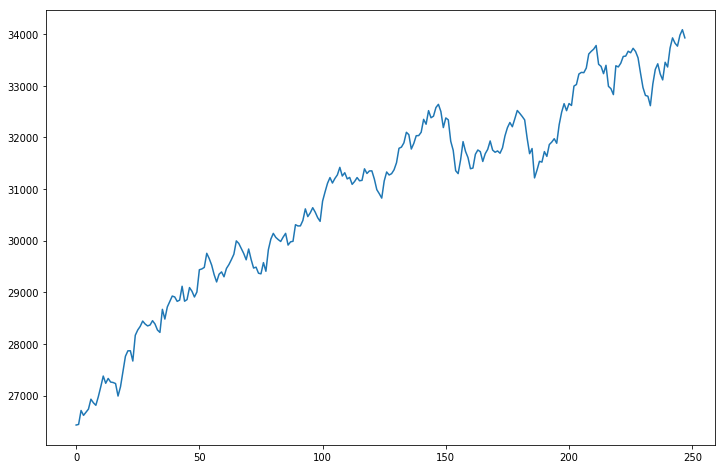

In [82]:
plt.figure(figsize=(12,8))
plt.plot(data['Open'])

In [84]:
X = data.iloc[:,1:2].values

In [85]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [86]:
y = X[1:,0:1]
X = X[0:247,0:1]
X_train = np.reshape(X, (247, 1, 1))

In [87]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [88]:
regressor = Sequential()

In [89]:
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))

In [90]:
regressor.add(Dense(units=1))

In [91]:
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

In [168]:
regressor.fit(x=X_train, y=y, batch_size=32, epochs=200)

Epoch 1/200
247/247 [==============================] - 0s 101us/step - loss: 5.3750e-04
Epoch 2/200
247/247 [==============================] - 0s 85us/step - loss: 5.3917e-04
Epoch 3/200
247/247 [==============================] - 0s 85us/step - loss: 5.3752e-04
Epoch 4/200
247/247 [==============================] - 0s 97us/step - loss: 5.3398e-04
Epoch 5/200
247/247 [==============================] - 0s 122us/step - loss: 5.3966e-04
Epoch 6/200
247/247 [==============================] - 0s 101us/step - loss: 5.4232e-04
Epoch 7/200
247/247 [==============================] - 0s 113us/step - loss: 5.3546e-04
Epoch 8/200
247/247 [==============================] - 0s 134us/step - loss: 5.3336e-04
Epoch 9/200
247/247 [==============================] - 0s 130us/step - loss: 5.4193e-04
Epoch 10/200
247/247 [==============================] - 0s 101us/step - loss: 5.3710e-04
Epoch 11/200
247/247 [==============================] - 0s 109us/step - loss: 5.4300e-04
Epoch 12/200
247/247 [===========

247/247 [==============================] - 0s 89us/step - loss: 5.3336e-04
Epoch 94/200
247/247 [==============================] - 0s 113us/step - loss: 5.3799e-04
Epoch 95/200
247/247 [==============================] - 0s 109us/step - loss: 5.3352e-04
Epoch 96/200
247/247 [==============================] - 0s 128us/step - loss: 5.4117e-04
Epoch 97/200
247/247 [==============================] - 0s 97us/step - loss: 5.3208e-04
Epoch 98/200
247/247 [==============================] - 0s 97us/step - loss: 5.3357e-04
Epoch 99/200
247/247 [==============================] - 0s 105us/step - loss: 5.5300e-04
Epoch 100/200
247/247 [==============================] - 0s 122us/step - loss: 5.3999e-04
Epoch 101/200
247/247 [==============================] - 0s 105us/step - loss: 5.3203e-04
Epoch 102/200
247/247 [==============================] - 0s 99us/step - loss: 5.3152e-04
Epoch 103/200
247/247 [==============================] - 0s 122us/step - loss: 5.3235e-04
Epoch 104/200
247/247 [===========

247/247 [==============================] - 0s 85us/step - loss: 5.3238e-04
Epoch 185/200
247/247 [==============================] - 0s 89us/step - loss: 5.2394e-04
Epoch 186/200
247/247 [==============================] - 0s 85us/step - loss: 5.3785e-04
Epoch 187/200
247/247 [==============================] - 0s 122us/step - loss: 5.2937e-04
Epoch 188/200
247/247 [==============================] - 0s 105us/step - loss: 5.4539e-04
Epoch 189/200
247/247 [==============================] - 0s 134us/step - loss: 5.3432e-04
Epoch 190/200
247/247 [==============================] - 0s 101us/step - loss: 5.2708e-04
Epoch 191/200
247/247 [==============================] - 0s 118us/step - loss: 5.3101e-04
Epoch 192/200
247/247 [==============================] - 0s 101us/step - loss: 5.4934e-04
Epoch 193/200
247/247 [==============================] - 0s 113us/step - loss: 5.3797e-04
Epoch 194/200
247/247 [==============================] - 0s 103us/step - loss: 5.2348e-04
Epoch 195/200
247/247 [====

In [161]:
prediction = regressor.predict(X_train)

In [162]:
prediction_stock = sc.inverse_transform(prediction)

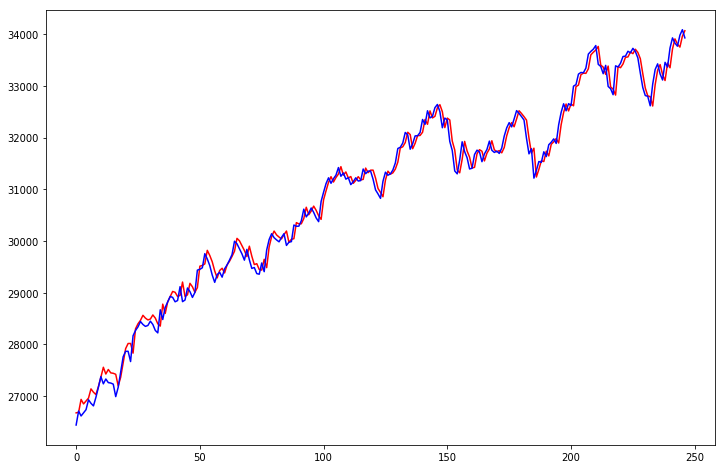

In [163]:
plt.figure(figsize=(12,8))
plt.plot(prediction_stock, color='red')
plt.plot(data.iloc[1:,1:2].values, color='blue')